In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn import metrics, svm

from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA

from tabulate import tabulate

import joblib
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
train_df = pd.read_csv("/content/drive/MyDrive/Alternative_Data/application_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Alternative_Data/application_test.csv")

## EDA

In [86]:
df = train_df[train_df['CODE_GENDER'] != 'XNA']
df = test_df[test_df['CODE_GENDER'] != 'XNA']

In [87]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


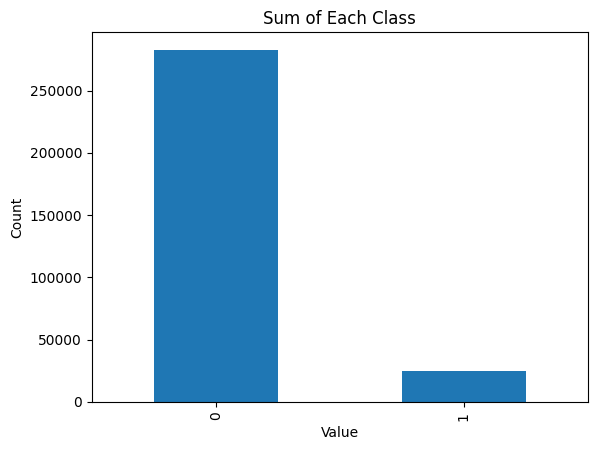

In [88]:
classes_sum = train_df['TARGET'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of Each Class')
plt.show()

In [89]:
count_class_one = train_df['TARGET'].eq(1).sum()
count_class_one

24825

In [90]:
class_zero = train_df[train_df['TARGET'] == 0].sample(24825)
class_one = train_df[train_df['TARGET'] == 1].sample(24825)

balanced_df = pd.concat([class_zero, class_one])
balanced_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
211693,345318,0,Cash loans,F,Y,Y,0,112500.0,450000.0,23107.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
225979,361744,0,Cash loans,F,N,Y,0,112500.0,152820.0,15241.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
2809,103277,0,Cash loans,F,N,Y,0,180000.0,90000.0,9031.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
270125,413057,0,Cash loans,F,N,N,0,112500.0,454500.0,24345.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
123822,243595,0,Revolving loans,F,N,Y,1,135000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0


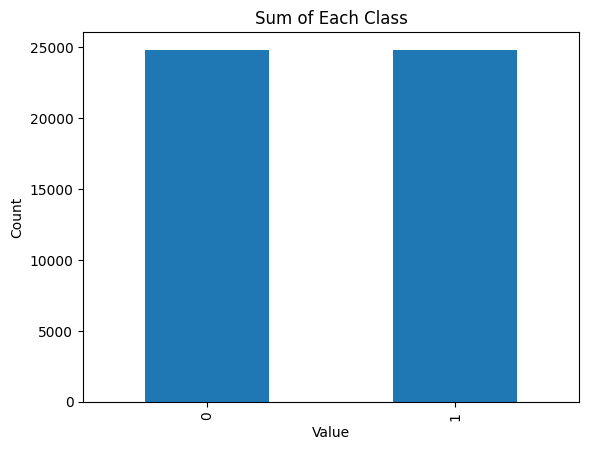

In [91]:
classes_sum = balanced_df['TARGET'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of Each Class')
plt.show()

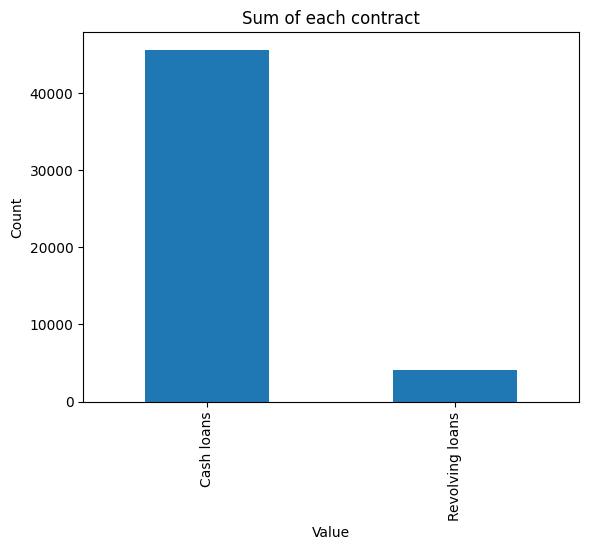

In [92]:
classes_sum = balanced_df['NAME_CONTRACT_TYPE'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of each contract')
plt.show()

In [93]:
UNUSED_FEATURES = ['NAME_CONTRACT_TYPE','SK_ID_CURR', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
CATEGORICAL_FEATURES = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
NUMERICAL_FEATURES = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
CYCLICAL_FEATURES = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']
YES_NO_FEATURES = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
BINARY_FEATURES = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [94]:
# for col in CATEGORICAL_FEATURES:
#   classes_sum = balanced_df[col].value_counts()

#   classes_sum.plot(kind='bar')
#   plt.xlabel('Value')
#   plt.ylabel('Count')
#   plt.title(f'Sum of each {col}')
#   plt.show()

In [95]:
balanced_df = balanced_df.drop(UNUSED_FEATURES, axis=1)
y = balanced_df['TARGET']
X = balanced_df.drop(columns=['TARGET'], axis=1)

## Data Splitting

In [96]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
43450,F,N,Y,0,135000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
127339,F,N,Y,2,180000.0,521280.0,31630.5,450000.0,Unaccompanied,Working,...,0.0,0.0,0.0,-457.0,0.0,0.0,0.0,0.0,1.0,1.0
151159,F,N,Y,0,225000.0,1034680.5,37296.0,927000.0,Unaccompanied,Commercial associate,...,0.0,1.0,0.0,-2156.0,0.0,0.0,0.0,1.0,1.0,2.0
164482,F,N,N,0,225000.0,170640.0,11533.5,135000.0,Unaccompanied,Commercial associate,...,0.0,0.0,0.0,-1820.0,NaN,NaN,NaN,NaN,NaN,NaN
102548,F,N,Y,1,72000.0,173092.5,12438.0,157500.0,Unaccompanied,Pensioner,...,0.0,0.0,0.0,-1075.0,NaN,NaN,NaN,NaN,NaN,NaN


## Mapping Features

In [98]:
def map_features(df):
    mapping_YN = {'N': 0, 'Y': 1, 'No': 0, 'Yes': 1}
    mapping_gender = {'M': 0, 'F': 1}

    for col in YES_NO_FEATURES:
        df[col] = df[col].map(mapping_YN).fillna(0).astype(float).astype(int)

    df['CODE_GENDER'] = df['CODE_GENDER'].map(mapping_gender).fillna(0).astype(float).astype(int)
    df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].fillna(0).astype(float).astype(int)

    return df


In [99]:
X_train = map_features(X_train)
X_test = map_features(X_test)

## One Hot Encoding

In [100]:
def one_hot_encoding(encoder, df, isTrain):
    # Create a copy of the DataFrame to work with
    encoded_df = df.copy()

    # Fill missing values in categorical features
    encoded_df[CATEGORICAL_FEATURES] = encoded_df[CATEGORICAL_FEATURES].fillna('No_Ans')

    if isTrain:
        encoded = encoder.fit_transform(encoded_df[CATEGORICAL_FEATURES])
    else:
        encoded = encoder.transform(encoded_df[CATEGORICAL_FEATURES])

    feature_names = encoder.get_feature_names_out()

    # Create a new DataFrame with encoded values
    ohe_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
    ohe_df = ohe_df.astype(int)

    # Drop the categorical features from the encoded DataFrame
    encoded_df = encoded_df.drop(columns=CATEGORICAL_FEATURES)

    # Reset indices of the DataFrames
    encoded_df.reset_index(drop=True, inplace=True)
    ohe_df.reset_index(drop=True, inplace=True)

    # Concatenate the encoded DataFrame with the remaining features
    return pd.concat([encoded_df, ohe_df], axis=1)

In [101]:
ohe = OneHotEncoder(handle_unknown='ignore')  # Set handle_unknown to 'ignore'

X_train = one_hot_encoding(ohe, X_train, True)
X_test = one_hot_encoding(ohe, X_test, False)

# Save the OneHotEncoder model
joblib.dump(ohe, '/content/sample_data/onehotencoder.joblib')

['/content/sample_data/onehotencoder.joblib']

In [102]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,1,0,135000.0,180000.0,9000.0,180000.0,0.008575,-9317,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,2,180000.0,521280.0,31630.5,450000.0,0.018801,-15729,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,225000.0,1034680.5,37296.0,927000.0,0.035792,-17520,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,225000.0,170640.0,11533.5,135000.0,0.019101,-12934,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,72000.0,173092.5,12438.0,157500.0,0.008866,-13602,...,0,0,0,0,0,0,0,0,0,1


## Scaling Features




In [103]:
def scale_numerical_features(scaler, df, isTrain):
    # Create a copy of the DataFrame to work with
    scaled_df = df.copy()

    # Fill missing values in numerical features
    scaled_df[NUMERICAL_FEATURES] = scaled_df[NUMERICAL_FEATURES].fillna(0)

    if isTrain:
        scaled_features = scaler.fit_transform(scaled_df[NUMERICAL_FEATURES])
    else:
        scaled_features = scaler.transform(scaled_df[NUMERICAL_FEATURES])

    # Create a new DataFrame with scaled values
    scaled_features_df = pd.DataFrame(scaled_features, columns=NUMERICAL_FEATURES)

    # Drop the numerical features from the scaled DataFrame
    scaled_df = scaled_df.drop(columns=NUMERICAL_FEATURES)

    # Reset indices of the DataFrames
    scaled_df.reset_index(drop=True, inplace=True)
    scaled_features_df.reset_index(drop=True, inplace=True)

    # Concatenate the scaled DataFrame with the remaining features
    return pd.concat([scaled_df, scaled_features_df], axis=1)

In [104]:
scaler = StandardScaler()

X_train = scale_numerical_features(scaler, X_train, isTrain=True)
X_test = scale_numerical_features(scaler, X_test, isTrain=False)

# Save the OneHotEncoder model
joblib.dump(ohe, '/content/sample_data/standardscaler.joblib')

['/content/sample_data/standardscaler.joblib']

In [105]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,1,1,0,1,0,0,MONDAY,...,-0.346463,-0.188079,-0.300099,1.113026,-0.067131,-0.065519,10.846069,-0.270579,-0.385644,-0.347396
1,1,0,1,1,1,0,1,1,0,FRIDAY,...,-0.346463,-0.617937,-0.300099,0.541219,-0.067131,-0.065519,-0.152855,-0.270579,1.341083,-0.347396
2,1,0,1,1,1,0,1,0,0,SATURDAY,...,-0.346463,-0.188079,-0.300099,-1.584601,-0.067131,-0.065519,-0.152855,0.985837,1.341083,0.179689
3,1,0,0,1,1,0,1,0,0,FRIDAY,...,-0.346463,-0.617937,-0.300099,-1.164191,-0.067131,-0.065519,-0.152855,-0.270579,-0.385644,-0.874482
4,1,0,1,1,0,0,1,0,0,TUESDAY,...,-0.346463,-0.617937,-0.300099,-0.232034,-0.067131,-0.065519,-0.152855,-0.270579,-0.385644,-0.874482


## Cyclic Encoding

In [106]:
def day_encoder(df):
  mapping = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}

  df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].map(mapping)

  df['DAY_WEEK_SIN'] = np.sin(df['WEEKDAY_APPR_PROCESS_START'] * (2 * np.pi / 7))
  df['DAY_WEEK_COS'] = np.cos(df['WEEKDAY_APPR_PROCESS_START'] * (2 * np.pi / 7))

  df = df.drop(columns=['WEEKDAY_APPR_PROCESS_START'])
  return df

In [107]:
X_train = day_encoder(X_train)
X_test = day_encoder(X_test)

In [108]:
def hour_encoder(df):

  # Convert the hour (in 24h format) to a number between 0 and 1, and multiply it by 2*pi to convert it to radians
  df['HOUR_APPR_PROCESS_START_rad'] = df['HOUR_APPR_PROCESS_START'] / 24. * 2 * np.pi

  # Create the two new features using sine and cosine
  df['HOUR_APPR_PROCESS_START_sin'] = np.sin(df['HOUR_APPR_PROCESS_START_rad'])
  df['HOUR_APPR_PROCESS_START_cos'] = np.cos(df['HOUR_APPR_PROCESS_START_rad'])

  # Drop the original 'HOUR_APPR_PROCESS_START' column and the intermediary radians column
  df = df.drop(['HOUR_APPR_PROCESS_START_rad'], axis=1)

  return df

In [109]:
X_train = hour_encoder(X_train)
X_test = hour_encoder(X_test)

## Pre-Process Result

In [110]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,HOUR_APPR_PROCESS_START,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAY_WEEK_SIN,DAY_WEEK_COS,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos
0,1,0,1,1,1,0,1,0,0,12,...,-0.067131,-0.065519,10.846069,-0.270579,-0.385644,-0.347396,0.781831,0.623490,1.224647e-16,-1.000000e+00
1,1,0,1,1,1,0,1,1,0,11,...,-0.067131,-0.065519,-0.152855,-0.270579,1.341083,-0.347396,-0.974928,-0.222521,2.588190e-01,-9.659258e-01
2,1,0,1,1,1,0,1,0,0,10,...,-0.067131,-0.065519,-0.152855,0.985837,1.341083,0.179689,-0.781831,0.623490,5.000000e-01,-8.660254e-01
3,1,0,0,1,1,0,1,0,0,10,...,-0.067131,-0.065519,-0.152855,-0.270579,-0.385644,-0.874482,-0.974928,-0.222521,5.000000e-01,-8.660254e-01
4,1,0,1,1,0,0,1,0,0,18,...,-0.067131,-0.065519,-0.152855,-0.270579,-0.385644,-0.874482,0.974928,-0.222521,-1.000000e+00,-1.836970e-16


## SVM Model Creation

In [111]:
# Define the SVM model
svm_model = svm.LinearSVC()

# Train the model with our training data
svm_model.fit(X_train, y_train)


LinearSVC()

In [112]:
# Use the trained model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# Print a classification report to see the performance of the model on the test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      4965
           1       0.67      0.63      0.65      4965

    accuracy                           0.66      9930
   macro avg       0.66      0.66      0.66      9930
weighted avg       0.66      0.66      0.66      9930



In [113]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[3454 1511]
 [1837 3128]]


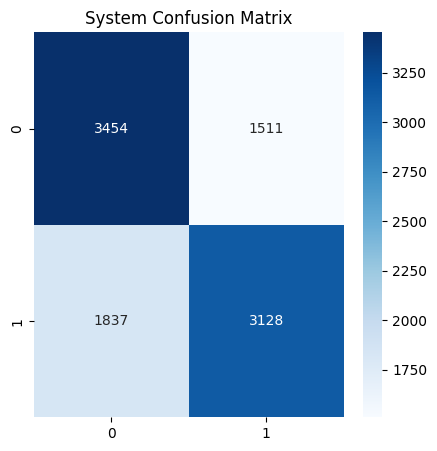

In [114]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('System Confusion Matrix')
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score

# Assume y_test are your true binary labels (0, 1) and y_pred are your model's predictions
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6628398791540784


## XGBoost Model Creation

In [116]:
# Create an instance of the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False,
                          objective='binary:logistic',
                          eval_metric='logloss',
                          n_estimators=100,
                          max_depth=5,
                          min_child_weight=1,
                          gamma=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          learning_rate=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [117]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [118]:
# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      4965
           1       0.69      0.68      0.68      4965

    accuracy                           0.69      9930
   macro avg       0.69      0.69      0.69      9930
weighted avg       0.69      0.69      0.69      9930

Confusion Matrix:
[[3434 1531]
 [1584 3381]]
accuracy: 0.686304


## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100,      # Number of trees
                             max_features='sqrt',  # Number of features for each tree
                             max_depth=10,         # Maximum depth of the tree
                             min_samples_split=2,  # Minimum samples for node split
                             min_samples_leaf=1,   # Minimum samples at each leaf node
                             bootstrap=True,       # Whether to use bootstrap samples
                             random_state=42)      # Random state for reproducibility


# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions using the trained model and test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100}%")


Test Accuracy: 66.78751258811681%


In [123]:
# Make predictions using the trained model and test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3273 1692]
 [1606 3359]]


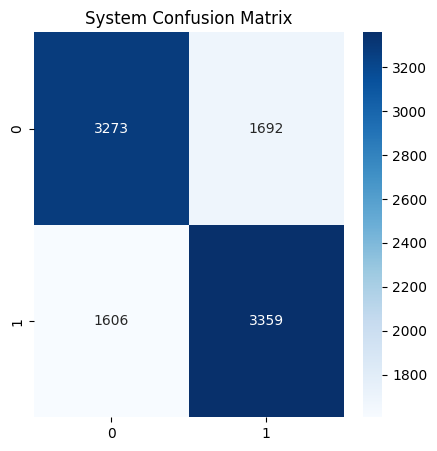

In [124]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('System Confusion Matrix')
plt.show()